# Policy Iteration

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print('Load Packages')

Load Packages


# FrozenLake

In [2]:
env = gym.make('FrozenLake8x8-v0')

obs_space = env.observation_space
n_state = obs_space.n
print('Observation space')
print("Total {} states".format(n_state))

act_space = env.action_space
n_act = act_space.n
print('Action space')
print("Total {} actions".format(n_act))

# TRANSITION MATRIX FOR FROZEN LAKE (ENVIRONMENT MODEL)
P = env.unwrapped.P
env.render()

Observation space
Total 64 states
Action space
Total 4 actions

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


# Define functions step by step

### Initial Policy

Initial Policy Distribution:



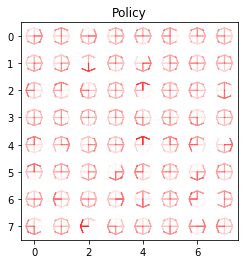

[[0.175 0.288 0.417 0.119]
 [0.135 0.34  0.115 0.41 ]
 [0.299 0.22  0.431 0.05 ]
 [0.131 0.259 0.308 0.303]
 [0.328 0.11  0.312 0.25 ]
 [0.31  0.285 0.049 0.356]
 [0.179 0.151 0.296 0.374]
 [0.314 0.289 0.154 0.242]
 [0.17  0.33  0.284 0.216]
 [0.125 0.377 0.278 0.22 ]
 [0.032 0.707 0.006 0.254]
 [0.293 0.149 0.241 0.317]
 [0.123 0.382 0.486 0.009]
 [0.127 0.258 0.3   0.315]
 [0.375 0.16  0.282 0.183]
 [0.278 0.163 0.276 0.283]
 [0.497 0.161 0.091 0.251]
 [0.299 0.173 0.053 0.474]
 [0.471 0.239 0.194 0.095]
 [0.213 0.24  0.236 0.311]
 [0.257 0.034 0.015 0.694]
 [0.279 0.245 0.217 0.259]
 [0.36  0.177 0.184 0.278]
 [0.053 0.518 0.039 0.391]
 [0.22  0.305 0.24  0.235]
 [0.217 0.343 0.088 0.352]
 [0.299 0.142 0.275 0.283]
 [0.173 0.206 0.284 0.337]
 [0.371 0.325 0.144 0.159]
 [0.294 0.312 0.15  0.244]
 [0.356 0.416 0.095 0.134]
 [0.229 0.21  0.296 0.264]
 [0.311 0.111 0.1   0.478]
 [0.236 0.018 0.446 0.299]
 [0.112 0.274 0.404 0.209]
 [0.264 0.134 0.392 0.209]
 [0.155 0.024 0.042 0.779]
 

In [3]:
def plot_policy(policy):
    plt.figure(num=0)
    plt.imshow(np.ones((8,8,3)))
    plt.title("Policy")  
    arr_len = 0.2
    for i in range(8):
        for j in range(8):
            s = i*8+j
            if policy[s][0]> 0:
                plt.arrow(j,i,-arr_len,0,color="r",alpha=policy[s][0],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
            if policy[s][1]> 0:
                plt.arrow(j,i,0,arr_len,color="r",alpha=policy[s][1],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
            if policy[s][2]> 0:
                plt.arrow(j,i,arr_len,0,color="r",alpha=policy[s][2],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
            if policy[s][3]> 0:
                plt.arrow(j,i,0,-arr_len,color="r",alpha=policy[s][3],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
    plt.show()
    
policy = np.random.uniform(size=(n_state,n_act)) # sample random number between 0 and 1
policy = policy/np.sum(policy,axis=1,keepdims=True) # make it sum to 1

np.set_printoptions(precision=3,suppress=True)
print("Initial Policy Distribution:\n")
plot_policy(policy)
print(policy)

### Policy Evaluation

Policy evaluation for random policy

Value of current policy:


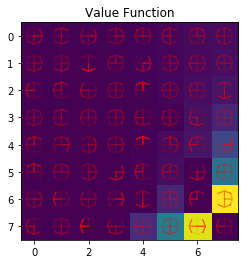

In [4]:
def policy_evaluation(env, policy, gamma = 0.99, epsilon = 1e-6):
    '''
    env : gym environment
    gamma : discount factor
    epsilon : terminal condition
    '''
    
    # Extract environment information
    obs_space = env.observation_space
    n_state = obs_space.n
    P = env.unwrapped.P    
    
    # Random initial
    v = np.random.uniform(size=(n_state,1))
    
    while True:
        v_prime = np.zeros((n_state,))
        for s in P.keys(): # For all states s, update v(s)
            for a in P[s].keys(): # For all actions a
                for prob, next_s, reward, done in P[s][a]: # For all possible transitions (s,a,s')
                    v_prime[s] += (reward + gamma*v[next_s])*prob*policy[s][a]    
        
        dist = np.max(np.abs(v-v_prime))
        v = v_prime
        if dist < epsilon:
            break
    return v

def plot_results(policy, value): # For visualization
    plt.figure(num=0)
    plt.imshow(np.reshape(value,(8,8)))
    plt.title("Value Function")  
    arr_len = 0.2
    for i in range(8):
        for j in range(8):
            s = i*8+j
            if policy[s][0]> 0:
                plt.arrow(j,i,-arr_len,0,color="r",alpha=policy[s][0],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
            if policy[s][1]> 0:
                plt.arrow(j,i,0,arr_len,color="r",alpha=policy[s][1],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
            if policy[s][2]> 0:
                plt.arrow(j,i,arr_len,0,color="r",alpha=policy[s][2],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
            if policy[s][3]> 0:
                plt.arrow(j,i,0,-arr_len,color="r",alpha=policy[s][3],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
    plt.show()
    
if __name__ == '__main__':
    print('Policy evaluation for random policy\n')
    value = policy_evaluation(env, policy, gamma = 0.99, epsilon = 1e-6)
    print('Value of current policy:')
    plot_results(policy, value)

### Policy Improvement

Policy improvement

Improved Policy:


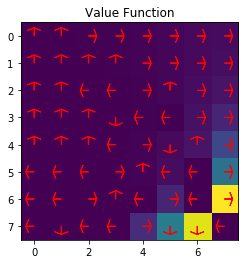

In [5]:
def policy_improvement(env, v, gamma = 0.99):
    obs_space = env.observation_space
    n_state = obs_space.n
    act_space = env.action_space
    n_act = act_space.n
    q = np.zeros((n_state,n_act))
    
    for s in P.keys():# For all states s,
        for a in P[s].keys():# For all actions a
            for prob, next_s, reward, done in P[s][a]:
                q[s,a] += (reward + gamma*v[next_s])*prob # Compute q[s,a] from v[s'], keep adding r[s,a,s']+gamma*v[s'] for all transition
                    
    policy = np.zeros((n_state,n_act))
    policy[np.arange(n_state),np.argmax(q,axis=1)] = 1
    
    return policy

if __name__ == '__main__':
    print('Policy improvement\n')
    policy = policy_improvement(env, value)
    print('Improved Policy:')
    plot_results(policy, value)

### Policy Iteration

Policy Iteration
Computation Time : 44.30


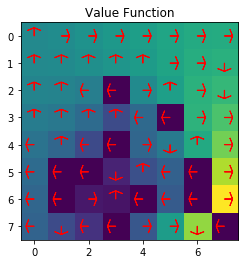

In [6]:
def policy_iteration(env):
    policy = np.random.uniform(size=(n_state,n_act))
    policy = policy/np.sum(policy,axis=1,keepdims=True)

    while True:
        value = policy_evaluation(env, policy) # Evaluate value of current policy
        policy_prime = policy_improvement(env, value) # Find greedy policy

        if (policy == policy_prime).all(): # If policy doesn't change, stop
            break
        policy = policy_prime # update new policy
    
    return policy, value
    
if __name__=='__main__': 
    print("Policy Iteration")
    import time
    start = time.time()
    policy, value = policy_iteration(env)
    print("Computation Time : %.2f"%(time.time() - start))
    plot_results(policy, value)

### Run optimal policy

In [7]:
obs = env.reset()
for t in range(10000):
    print('t = %d'%t)
    env.render()
    print('')
    action = np.random.choice(n_act, 1, p=policy[obs][:])[0]
    next_obs, reward, done, info = env.step(action)
    obs = next_obs
    if done:
        break
env.render()
env.close()

t = 0

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 1
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 2
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 3
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 4
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 5
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 6
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 7
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 8
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 9
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 10
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 11
  (Right)
SFFFFFFF
FFFFFFFF
FFF

# Numpy Version

Policy Iteration Compact
Computation Time : 1.77



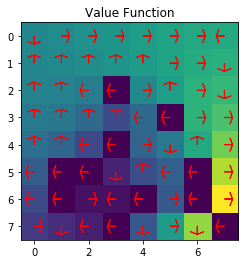

t = 0

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 1
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 2
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 3
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 4
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 5
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 6
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 7
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 8
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 9
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 10
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 11
  (Right)
SFFFFFFF
FFFFFFFF
FF

In [8]:
def policy_evaluation_np(env, P, r, policy, gamma = 0.99, epsilon = 1e-6):
    
    # Extract environment information
    obs_space = env.observation_space
    act_space = env.action_space
    n_state = obs_space.n
    n_act = act_space.n
        
    # Random initial
    v = np.random.uniform(size=(n_state,))
    
    while True:
        v_prime = np.sum(policy*np.sum((r+gamma*np.tile(v[np.newaxis,np.newaxis,:],reps=(n_state,n_act,1)))*P,axis=2),axis=1)
        dist = np.max(np.abs(v-v_prime))
        v = v_prime
        if dist < epsilon:
            break
    return v

def policy_improvement_np(env, P, r, v, gamma = 0.99):
    obs_space = env.observation_space
    act_space = env.action_space
    n_state = obs_space.n
    n_act = act_space.n
    
    q = np.sum((r+gamma*np.tile(v[np.newaxis,np.newaxis,:],reps=(n_state,n_act,1)))*P,axis=2)
                    
    policy = np.zeros((n_state,n_act))
    policy[np.arange(n_state),np.argmax(q,axis=1)] = 1
    
    return policy

def policy_iteration_np(env):
    policy = np.random.uniform(size=(n_state,n_act))
    policy = policy/np.sum(policy,axis=1,keepdims=True)
    P = np.zeros((n_state,n_act,n_state))
    r = np.zeros((n_state,n_act,n_state))
    for s in env.unwrapped.P.keys(): # For all states s, update v(s)
        for a in env.unwrapped.P[s].keys(): # For all actions a
            for prob, next_s, reward, done in env.unwrapped.P[s][a]: # For all possible transitions (s,a,s')
                P[s][a][next_s]=prob
                r[s][a][next_s]=reward
            
    while True:
        value = policy_evaluation_np(env, P, r, policy) # Evaluate value of current policy
        policy_prime = policy_improvement_np(env, P, r, value) # Find greedy policy

        if (policy == policy_prime).all(): # If policy doesn't change, stop
            break
        policy = policy_prime # update new policy
    
    return policy, value

if __name__=='__main__': 
    print("Policy Iteration Compact")
    import time
    start = time.time()
    policy, value = policy_iteration_np(env)
    print("Computation Time : %.2f"%(time.time() - start))
    print('')
    plot_results(policy, value)
    
    obs = env.reset()
    for t in range(10000):
        print('t = %d'%t)
        env.render()
        print('')
        action = np.random.choice(n_act, 1, p=policy[obs])[0]
        next_obs, reward, done, info = env.step(action)
        obs = next_obs
        if done:
            break
    env.render()
    env.close()